## Import all the necessary libraries

In [1]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm 
from sklearn.preprocessing import FunctionTransformer
import itertools    

## Load the keys to query the data. This step is omitted for Fall 2022 Hack 

In [2]:
import os
BIGQUERY_PROJECT = 'cloud-test-ironhacks'
BIGQUERY_KEYPATH = 'cloud-test-ironhacks-c1010c49a602.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = BIGQUERY_KEYPATH
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

## Query the data and see how they look like

In [3]:
query = """
SELECT * FROM `cloud-test-ironhacks.dwd_data.suppression_remove`

"""

query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data = data.dropna()
data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
59040,9bee42b55f891413ae7fac2d9d89280a,20210306.0,10.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59064,9bee42b55f891413ae7fac2d9d89280a,20210529.0,22.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59123,3952d1e916f8cad4225e4b9e29f62a06,20210306.0,10.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59147,3952d1e916f8cad4225e4b9e29f62a06,20210529.0,22.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59178,3952d1e916f8cad4225e4b9e29f62a06,20211016.0,42.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184317,20f6ad2e745b760f4d67491c4c9f2881,20210807.0,32.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184318,20f6ad2e745b760f4d67491c4c9f2881,20210814.0,33.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184319,20f6ad2e745b760f4d67491c4c9f2881,20210821.0,34.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184320,20f6ad2e745b760f4d67491c4c9f2881,20210828.0,35.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cumulate the data according to the week_number. 

In [4]:
df = data.groupby(['week_number']).total_claims.sum().groupby(level=0).cumsum().reset_index()
df

,week_number,total_claims
0,1.0,198.0
1,2.0,13.0
2,3.0,232.0
3,4.0,0.0
4,5.0,198.0
5,6.0,84.0
6,7.0,128.0
7,8.0,194.0
8,9.0,298.0
9,10.0,92.0


## Plot the overall data to see how the trend looks like. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week_number', ylabel='total_claims'>

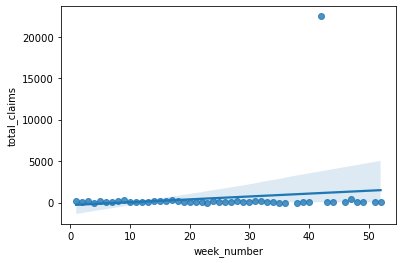

In [5]:
sns.regplot(df['week_number'], df['total_claims'])

## Start performing predictions on the overall data without the granularity from uu_id

> We do this primarily to decide if we should go with Linear Regression or Lag Regression. Note there are many ways to forecast which model might work better. 

In [6]:
X = df['week_number'].values.reshape(-1,1)
y = df['total_claims'].values.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state = 0)

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [9]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-321.85294759]
[[35.741227]]


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
outcome = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
outcome

,Actual,Predicted
0,43.0,750.383862
1,198.0,-143.146813


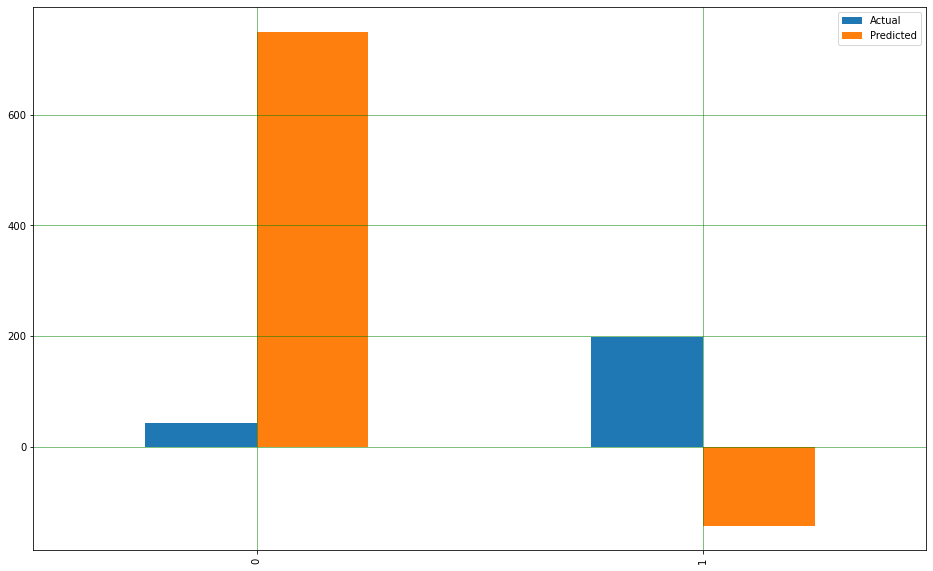

In [12]:
outcome = outcome.head(25)
outcome.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 524.2653374901895
Mean Squared Error: 308386.5382543503
Root Mean Squared Error: 555.325614621143


## Start modeling with Lag Regression 

In [14]:
df['lag'] = df['total_claims'].shift(1).dropna()
df

,week_number,total_claims,lag
0,1.0,198.0,NaN
1,2.0,13.0,198.0
2,3.0,232.0,13.0
3,4.0,0.0,232.0
4,5.0,198.0,0.0
5,6.0,84.0,198.0
6,7.0,128.0,84.0
7,8.0,194.0,128.0
8,9.0,298.0,194.0
9,10.0,92.0,298.0


In [15]:
X = df['lag'].dropna()
y = df['total_claims']
y, X = y.align(X, join='inner')  # drop corresponding values in target
X

1       198.0
2        13.0
3       232.0
4         0.0
5       198.0
6        84.0
7       128.0
8       194.0
9       298.0
10       92.0
11      103.0
12       62.0
13       79.0
14      203.0
15      147.0
16      135.0
17      257.0
18      166.0
19       35.0
20       62.0
21      125.0
22       33.0
23        0.0
24      167.0
25       58.0
26       38.0
27       51.0
28      195.0
29      102.0
30       43.0
31      142.0
32      170.0
33       41.0
34       80.0
35        0.0
36        0.0
37       11.0
38       24.0
39       24.0
40    22482.0
41       90.0
42       68.0
43       28.0
44      418.0
45       76.0
46       55.0
47       12.0
Name: lag, dtype: float64

In [16]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state = 0)

regressor = LinearRegression().fit(X,y)

In [17]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[590.55254233]
[[-0.02575295]]


In [18]:
y_pred = regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,43.0,587.925742
1,0.0,588.492306


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 566.7090240680132
Mean Squared Error: 321633.62935341994
Root Mean Squared Error: 567.1275247714749


## Now we decided we should use Linear Regression due to the better RMSE value. 

## Sort the dataframe 

> Sort the dataframe according to week_number so that we can use test_train_split directly on the top portion of the dataframe as the training set by setting stratify = False and shuffle = False. There are many ways to doing this. 

In [21]:
data = data.sort_values('week_number')
data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
184286,20f6ad2e745b760f4d67491c4c9f2881,20210102.0,1.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66845,6a0883d610107aaac9cbd74ebfbaf0aa,20210102.0,1.0,18157.0,10400.0,"Census Tract 104, Tippecanoe County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177619,ffbc87dc4bde6828daff6ad43e12db4a,20210102.0,1.0,18071.0,967700.0,"Census Tract 9677, Jackson County, Indiana",25.0,0.0,0.0,14.0,...,14.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
178459,98a4e5ce1633b5e541983fba21bd7395,20210102.0,1.0,18137.0,968500.0,"Census Tract 9685, Ripley County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65467,ca9ffd0d2d92a39e08f1e1d1fa052e61,20210102.0,1.0,18157.0,10300.0,"Census Tract 103, Tippecanoe County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87623,1e86730cef0c1021f0048c175fc96184,20211127.0,48.0,18067.0,1500.0,"Census Tract 15, Howard County, Indiana",76.0,0.0,0.0,64.0,...,62.0,14.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,19.0
96594,7dd5fff353cd08adc694aa74d7fa31af,20211204.0,49.0,18063.0,210202.0,"Census Tract 2102.02, Hendricks County, Indiana",31.0,0.0,0.0,18.0,...,14.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
166051,a0875049afbd1cb4735e07c03fb8baae,20211204.0,49.0,18041.0,954400.0,"Census Tract 9544, Fayette County, Indiana",24.0,0.0,0.0,14.0,...,11.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
84641,e3e95cb95a379d758a44832a471c5350,20211218.0,51.0,18089.0,12100.0,"Census Tract 121, Lake County, Indiana",12.0,0.0,0.0,12.0,...,0.0,12.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


## Function to print the dataframe according to the desired output format. 

In [22]:
def printexcel(result, filename):
    frame = pd.DataFrame(list(result.items()), columns=['uu_id','total_claims'])
    frame['total_claims'] =  frame['total_claims'].apply(lambda x: str(x).replace('[','').replace(']',''))
    frame['total_claims'] = frame['total_claims'].astype(float)
    frame.to_csv(filename, index=False)

## Function to predict week 52. 

In [23]:
def regressionsquare(data, yvar, xvars):
    X_train, X_test, y_train, y_test = train_test_split(data[xvars], data[yvar], train_size=0.9991, random_state=42, shuffle=False, stratify=None)
    result = sm.OLS(y_train, X_train).fit()
    predictions = result.predict(52)
    return predictions
result = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number')
print(result)

uu_id
001cd9ae23064d7f0fd3cd327c873d8d                  [0.0]
0024b3c6293e38b01016693d728f424d                  [0.0]
005be9532fd717dc36d4be318fd9ad25                  [0.0]
0068776d88cb6d1ab5c7059fbd3dd3cb                  [0.0]
007c1caccff1fbb3a0b8a10790f77141                  [0.0]
                                           ...         
fe395470f102321d11f5e79c9c7d042e                  [0.0]
fec22e0c67a77bb3d5be2949caddb035                  [0.0]
fec479d0202d6e1e3f051a9ee902ff5d                  [0.0]
ff939f826248519ada3af41126168e88                  [0.0]
ffbc87dc4bde6828daff6ad43e12db4a    [2.222222222222224]
Length: 1511, dtype: object


In [24]:
result_dict1 = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number').to_dict()
printexcel(result_dict1, 'model-52.csv')

## Read the output file to compare actual and predicted value in week 52

In [25]:
df = pd.read_csv('model-52.csv')
df

,uu_id,total_claims
0,001cd9ae23064d7f0fd3cd327c873d8d,0.000000
1,0024b3c6293e38b01016693d728f424d,0.000000
2,005be9532fd717dc36d4be318fd9ad25,0.000000
3,0068776d88cb6d1ab5c7059fbd3dd3cb,0.000000
4,007c1caccff1fbb3a0b8a10790f77141,0.000000
...,...,...
1506,fe395470f102321d11f5e79c9c7d042e,0.000000
1507,fec22e0c67a77bb3d5be2949caddb035,0.000000
1508,fec479d0202d6e1e3f051a9ee902ff5d,0.000000
1509,ff939f826248519ada3af41126168e88,0.000000


## Actual value for week 52. Note, there is only one uu_id that has week 52 data. 

In [26]:
result = data[data['week_number']==52]['total_claims']
result

66592    34.0
Name: total_claims, dtype: float64

## Predicted value for week 52. Note, there is only one uu_id that has week 52 data

In [27]:
result = df[df['uu_id']== 'e8f426c17a7172179be379cb926bd278']['total_claims']
result

1378    41.106022
Name: total_claims, dtype: float64

> Week 52 prediction not too bad

## Function to predict week 51

In [28]:
def regressionsquare(data, yvar, xvars):
    X_train, X_test, y_train, y_test = train_test_split(data[xvars], data[yvar], train_size=0.9991, random_state=42, shuffle=False, stratify=None)
    result = sm.OLS(y_train, X_train).fit()
    predictions = result.predict(51)
    return predictions
result = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number')
print(result)

uu_id
001cd9ae23064d7f0fd3cd327c873d8d                   [0.0]
0024b3c6293e38b01016693d728f424d                   [0.0]
005be9532fd717dc36d4be318fd9ad25                   [0.0]
0068776d88cb6d1ab5c7059fbd3dd3cb                   [0.0]
007c1caccff1fbb3a0b8a10790f77141                   [0.0]
                                            ...         
fe395470f102321d11f5e79c9c7d042e                   [0.0]
fec22e0c67a77bb3d5be2949caddb035                   [0.0]
fec479d0202d6e1e3f051a9ee902ff5d                   [0.0]
ff939f826248519ada3af41126168e88                   [0.0]
ffbc87dc4bde6828daff6ad43e12db4a    [2.1794871794871815]
Length: 1511, dtype: object


In [29]:
result_dict1 = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number').to_dict()
printexcel(result_dict1, 'model-51.csv')

In [30]:
df = pd.read_csv('model-51.csv')
df

,uu_id,total_claims
0,001cd9ae23064d7f0fd3cd327c873d8d,0.000000
1,0024b3c6293e38b01016693d728f424d,0.000000
2,005be9532fd717dc36d4be318fd9ad25,0.000000
3,0068776d88cb6d1ab5c7059fbd3dd3cb,0.000000
4,007c1caccff1fbb3a0b8a10790f77141,0.000000
...,...,...
1506,fe395470f102321d11f5e79c9c7d042e,0.000000
1507,fec22e0c67a77bb3d5be2949caddb035,0.000000
1508,fec479d0202d6e1e3f051a9ee902ff5d,0.000000
1509,ff939f826248519ada3af41126168e88,0.000000


## Actual value for week 51. Note, there is only one uu_id that has week 51 data. 

In [31]:
result = data[data['week_number']== 51]['total_claims']
result

84641    12.0
Name: total_claims, dtype: float64

## Predicted value for week 51. Note, there is only one uu_id that has week 51 data

In [32]:
result = df[df['uu_id']== 'e3e95cb95a379d758a44832a471c5350']['total_claims']
result

1352    0.0
Name: total_claims, dtype: float64

> Week 51 prediction a bit off, but not too bad either. 

## Function to predict week 49 

In [33]:
def regressionsquare(data, yvar, xvars):
    X_train, X_test, y_train, y_test = train_test_split(data[xvars], data[yvar], train_size=0.9991, random_state=42, shuffle=False, stratify=None)
    result = sm.OLS(y_train, X_train).fit()
    predictions = result.predict(49)
    return predictions
result = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number')
print(result)

uu_id
001cd9ae23064d7f0fd3cd327c873d8d                  [0.0]
0024b3c6293e38b01016693d728f424d                  [0.0]
005be9532fd717dc36d4be318fd9ad25                  [0.0]
0068776d88cb6d1ab5c7059fbd3dd3cb                  [0.0]
007c1caccff1fbb3a0b8a10790f77141                  [0.0]
                                           ...         
fe395470f102321d11f5e79c9c7d042e                  [0.0]
fec22e0c67a77bb3d5be2949caddb035                  [0.0]
fec479d0202d6e1e3f051a9ee902ff5d                  [0.0]
ff939f826248519ada3af41126168e88                  [0.0]
ffbc87dc4bde6828daff6ad43e12db4a    [2.094017094017096]
Length: 1511, dtype: object


In [34]:
result_dict1 = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number').to_dict()
printexcel(result_dict1, 'model-49.csv')

In [35]:
df = pd.read_csv('model-49.csv')
df

,uu_id,total_claims
0,001cd9ae23064d7f0fd3cd327c873d8d,0.000000
1,0024b3c6293e38b01016693d728f424d,0.000000
2,005be9532fd717dc36d4be318fd9ad25,0.000000
3,0068776d88cb6d1ab5c7059fbd3dd3cb,0.000000
4,007c1caccff1fbb3a0b8a10790f77141,0.000000
...,...,...
1506,fe395470f102321d11f5e79c9c7d042e,0.000000
1507,fec22e0c67a77bb3d5be2949caddb035,0.000000
1508,fec479d0202d6e1e3f051a9ee902ff5d,0.000000
1509,ff939f826248519ada3af41126168e88,0.000000


## Actual value for week 49. Note, there is only two uu_id that has week 49 data. 

In [36]:
result = data[data['week_number'] == 49]['total_claims']
result

96594     31.0
166051    24.0
Name: total_claims, dtype: float64

## Predicted value for week 49. Note, there is only two uu_id that has week 49 data. 

In [37]:
result = df[df['uu_id'] == 'a0875049afbd1cb4735e07c03fb8baae']['total_claims']
result

959    26.294719
Name: total_claims, dtype: float64

In [38]:
result = df[df['uu_id'] == '7dd5fff353cd08adc694aa74d7fa31af']['total_claims']
result

750    13.147359
Name: total_claims, dtype: float64

> Model not too bad in predicting week 49 